<a href="https://colab.research.google.com/github/mleticiamn/ClassificationProject-Jamming/blob/main/RaFo_Jamming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import time

In [ ]:
def confusion_matrix(real, prediction):
  confusion_matrix = metrics.confusion_matrix(real, prediction)

  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                              display_labels=["1", "2", "3"])

  plt.figure(figsize=(6,6))
  cm_display.plot(cmap='gist_earth_r')
  plt.ylabel('True label', fontsize=15)
  plt.xlabel('Predicted label', fontsize=15)

  plt.gca().xaxis.set_tick_params(labelsize=18)
  plt.gca().yaxis.set_tick_params(labelsize=18)

  for text in cm_display.ax_.texts:
      text.set_fontsize(21)

  plt.show()

  return confusion_matrix

In [ ]:
dataset = pd.read_csv('RF_Jamming_Dataset_1.csv')
dataset = dataset.rename(columns={'Relative_Speed': 'RS'})
dataset = dataset.drop('Speed', axis=1)
dataset.head()

,Time,SNR,RSSI,PDR,RS,Scenario
0,0.1,22.35,-48.38,1.000000,25.313981,2
1,0.2,21.62,-49.14,0.999999,25.421060,2
2,0.3,20.85,-49.92,0.999997,25.327275,2
3,0.4,20.07,-50.69,0.999989,25.256933,2
4,0.5,19.30,-51.46,0.999958,25.038900,2


In [ ]:
# Dividing our dataset into features and targets
data_targets = dataset['Scenario']
data_features = dataset.drop('Scenario', axis=1)

In [ ]:
# Split data
# 70% of our data used for testing
X_train, X_test, y_train, y_test = train_test_split(data_features, data_targets,
                                                    test_size=0.7, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#grid_search.fit(X_train, y_train)
#print("Melhores Parâmetros:")
#print(grid_search.best_params_)

In [ ]:
best_rf = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)
preds = best_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9542857142857143


In [ ]:
start_time = time.time()
preds = best_rf.predict(X_test)
inference_time = (time.time()-start_time)/len(X_test)

In [ ]:
print(f'Tempo de treinamento: {inference_time}')

Tempo de treinamento: 3.8343497685023715e-05


<Figure size 600x600 with 0 Axes>

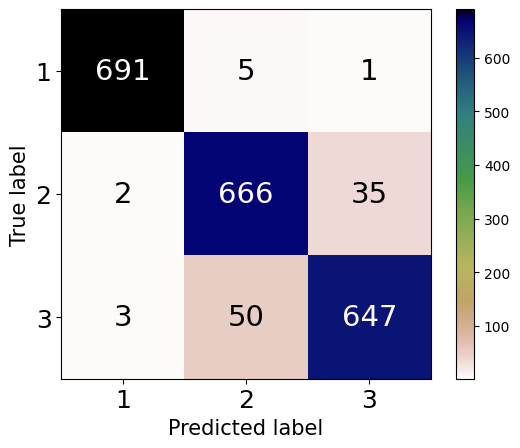

In [ ]:
cm = confusion_matrix(y_test, preds)

In [ ]:
true_pos = np.diag(cm)
false_pos = np.sum(cm, axis=0) - true_pos
false_neg = np.sum(cm, axis=1) - true_pos

In [ ]:
precision = np.sum(true_pos / (true_pos + false_pos)) / len(true_pos)
recall = np.sum(true_pos / (true_pos + false_neg)) / len(true_pos)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {(2*precision*recall)/(precision+recall)}')

Precision: 0.9546081710777456
Recall: 0.9543486046536714
F1-Score: 0.9544783702187064


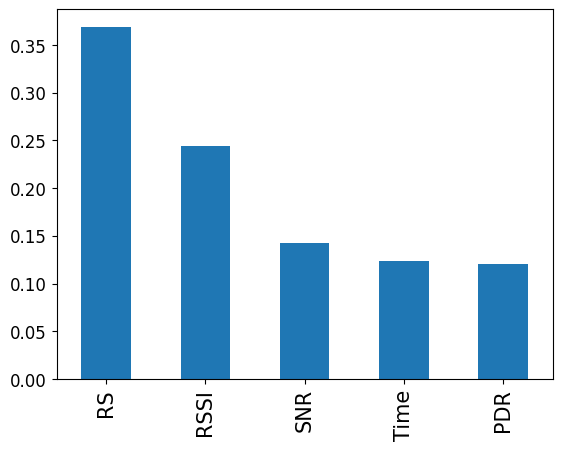

In [ ]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
ax = feature_importances.plot.bar()

for label in ax.get_xticklabels():
    label.set_fontsize(15)
for label in ax.get_yticklabels():
    label.set_fontsize(12)

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, data_features, data_targets, cv=5, scoring='accuracy')
print(f'Acurácia Média com Validação Cruzada: {np.mean(scores)}')

Acurácia Média com Validação Cruzada: 0.8


In [ ]:
n_iterations = 30

inference_times = []

for _ in range(n_iterations):
    start_time = time.time()
    preds = best_rf.predict(X_test)
    inference_time = time.time() - start_time
    inference_times.append(inference_time/len(X_test))

average_inference_time = np.mean(inference_times)

print(f"Tempo médio de inferência por previsão: {average_inference_time} segundos")

Tempo médio de inferência por previsão: 1.209643152025011e-05 segundos
